#### Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

##### **Estimation Statistics**

Estimation statistics is a branch of statistics that involves making inferences about a population based on a sample drawn from it. The goal of estimation is to determine the value of a population parameter (such as the mean or proportion) using sample data.

There are two main types of estimates: **point estimates** and **interval estimates**.

---

##### **1. Point Estimate**

A **point estimate** is a single value used to estimate a population parameter. It is calculated from the sample data and serves as the best guess for the unknown parameter of the population.

- **Example:** If you want to estimate the average height of adults in a city, you might take a random sample of 100 adults and calculate the sample mean. This sample mean (e.g., 170 cm) is a point estimate of the population mean.

###### **Key Characteristics of a Point Estimate:**
- **Accuracy:** How close the point estimate is to the actual population parameter.
- **Bias:** If the point estimate systematically overestimates or underestimates the parameter, it is considered biased.
- **Variance:** Measures the spread of the sample estimates around the actual population parameter.

---

##### **2. Interval Estimate**

An **interval estimate** provides a range of values within which the population parameter is expected to lie, along with a specified level of confidence (e.g., 95% confidence interval).

- **Example:** Instead of just providing the point estimate (170 cm), you might say that the average height of adults in the city is between 168 cm and 172 cm, with a 95% confidence level. This interval is calculated using the point estimate, the standard error of the estimate, and the chosen confidence level.

###### **Key Characteristics of an Interval Estimate:**
- **Confidence Level:** The probability that the interval contains the true population parameter (e.g., 95% confidence level means that 95 out of 100 such intervals would contain the true parameter).
- **Precision:** The width of the interval; narrower intervals indicate higher precision, while wider intervals provide more certainty that the interval includes the parameter.

---

##### **Summary:**

- **Point Estimate** gives a single best guess for the population parameter.
- **Interval Estimate** gives a range of values that is likely to contain the population parameter, along with a level of confidence.

#### Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation.


In [1]:
import math
from scipy.stats import t

def estimate_population_mean(sample_mean, sample_std, sample_size, confidence_level):
    """
    Estimates the population mean based on a sample mean, standard deviation, and size.
    
    Parameters:
    sample_mean (float): The mean of the sample.
    sample_std (float): The standard deviation of the sample.
    sample_size (int): The size of the sample.
    confidence_level (float): The desired confidence level (e.g., 0.95 for 95% confidence).
    
    Returns:
    tuple: The lower and upper bounds of the confidence interval for the population mean.
    """
    # Calculate the degrees of freedom
    df = sample_size - 1
    
    # Calculate the critical value from the t-distribution
    critical_value = t.ppf((1 + confidence_level) / 2, df)
    
    # Calculate the margin of error
    margin_of_error = critical_value * (sample_std / math.sqrt(sample_size))
    
    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    return lower_bound, upper_bound


sample_mean = 50
sample_std = 5
sample_size = 30
confidence_level = 0.95

lower_bound, upper_bound = estimate_population_mean(sample_mean, sample_std, sample_size, confidence_level)

print(f"The {confidence_level * 100}% confidence interval for the population mean is:")
print(f"({lower_bound:.2f}, {upper_bound:.2f})")


The 95.0% confidence interval for the population mean is:
(48.13, 51.87)


#### Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

##### **Hypothesis Testing**

**Hypothesis testing** is a statistical method used to evaluate two mutually exclusive statements (hypotheses) about a population parameter. The two hypotheses are:

- **Null hypothesis (H₀):** This is the initial claim or assumption about the population parameter. It is assumed to be true unless there is strong evidence against it.
- **Alternative hypothesis (H₁ or Hₐ):** This is the opposite of the null hypothesis. It is the hypothesis that the researcher hopes to support with sufficient evidence.

The goal of hypothesis testing is to determine whether there is enough statistical evidence in the sample data to reject the null hypothesis in favor of the alternative hypothesis.

---

##### **Hypothesis Testing Used**

Hypothesis testing is used for various reasons:

- To make inferences about population parameters based on sample data.
- To determine if a new treatment, product, or intervention is effective.
- To test if two or more groups differ on a particular characteristic.
- To assess the relationship between variables.

---

##### **Importance of Hypothesis Testing**

Hypothesis testing is crucial for several reasons:

- It provides a systematic and objective way to make decisions about a population based on sample data.
- It helps researchers draw conclusions and make informed decisions about their research questions or hypotheses.
- It quantifies the strength of evidence against the null hypothesis, allowing researchers to determine if the observed results are likely to have occurred by chance.
- It helps control the risk of making incorrect decisions, such as rejecting a true null hypothesis (**Type I error**) or failing to reject a false null hypothesis (**Type II error**).
- It is a fundamental tool in various fields, including medicine, social sciences, business, and engineering, for evaluating the significance of research findings and making informed decisions.


#### Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students.

##### **Hypothesis:**
- **Null Hypothesis (H₀):** The average weight of male college students is equal to or less than the average weight of female college students. $ H_0: \mu_{\text{male}} \leq \mu_{\text{female}} $

- **Alternative Hypothesis (H₁):** The average weight of male college students is greater than the average weight of female college students. $ H_1: \mu_{\text{male}} > \mu_{\text{female}} $
Where:
- $ \mu_{\text{male}} $ is the mean weight of male college students.
- $ \mu_{\text{female}} $ is the mean weight of female college students.

This is a **one-tailed hypothesis test** because the alternative hypothesis specifies a direction (greater than). The test would involve collecting sample data on the weights of male and female college students and then using a statistical test (such as a t-test) to determine if there is enough evidence to reject the null hypothesis in favor of the alternative hypothesis.


#### Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.

To conduct a hypothesis test on the difference between two population means, we can use Python's scipy.stats library, specifically the ttest_ind function, which performs a two-sample t-test. This test can help determine if there is a statistically significant difference between the means of two independent populations.

In [2]:
import numpy as np
from scipy.stats import ttest_ind

# Sample data from two populations
# Replace these with your actual sample data
sample1 = np.array([85, 90, 88, 92, 85, 87, 90, 88, 91, 89])  # Sample data from Population 1
sample2 = np.array([78, 82, 80, 79, 81, 77, 83, 76, 80, 78])  # Sample data from Population 2

# Perform a two-sample t-test
# ttest_ind assumes equal variance by default; use equal_var=False if variances are not assumed to be equal
t_stat, p_value = ttest_ind(sample1, sample2, alternative='greater')

# Output the test statistic and p-value
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Significance level
alpha = 0.05

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude a difference between the means.")


T-statistic: 8.8620
P-value: 0.0000
Reject the null hypothesis: There is a statistically significant difference between the means.


#### Explanation

##### Sample Data:
Replace `sample1` and `sample2` with your actual data.

##### Two-Sample t-Test:
The `ttest_ind` function compares the means of two independent samples.  
The `alternative='greater'` parameter specifies a one-tailed test where the alternative hypothesis is that the mean of the first population is greater than the mean of the second population.

##### Output:
The script prints the test statistic (`t_stat`) and p-value (`p_value`).  
It checks the p-value against the chosen significance level (`alpha = 0.05`), and based on the result, either rejects or fails to reject the null hypothesis.


##### Q6: What is a null and alternative hypothesis? Give some examples.

#### Null and Alternative Hypothesis

In hypothesis testing, we formulate two mutually exclusive statements to test a research question:

##### Null Hypothesis (H₀):
- The null hypothesis is a statement of no effect, no difference, or no relationship. It is the assumption that there is no significant difference between the specified populations, or that the effect observed in a sample is due to random chance.
- The null hypothesis is assumed to be true unless there is strong evidence against it, in which case it is rejected.

##### Alternative Hypothesis (H₁ or Hₐ):
- The alternative hypothesis is a statement that contradicts the null hypothesis. It represents what the researcher is trying to prove or support; it states that there is a significant effect, difference, or relationship between populations.
- The alternative hypothesis is accepted if there is enough evidence to reject the null hypothesis.

#### Examples of Null and Alternative Hypotheses:

##### 1. Testing a New Drug's Effectiveness:
- **Null Hypothesis (H₀):** The new drug has no effect on reducing blood pressure compared to the placebo.  
  $ H_0: \mu_{\text{drug}} = \mu_{\text{placebo}} $
  
- **Alternative Hypothesis (H₁):** The new drug has an effect on reducing blood pressure compared to the placebo.  
  $ H_1: \mu_{\text{drug}} \neq \mu_{\text{placebo}} $

##### 2. Comparing Two Teaching Methods:
- **Null Hypothesis (H₀):** There is no difference in the average test scores of students taught using Method A and Method B.  
  $ H_0: \mu_A = \mu_B $
  
- **Alternative Hypothesis (H₁):** There is a difference in the average test scores of students taught using Method A and Method B.  
  $ H_1: \mu_A \neq \mu_B $

##### 3. Testing a Coin's Fairness:
- **Null Hypothesis (H₀):** The coin is fair, and the probability of heads is 0.5.  
  $ H_0: p = 0.5 $
  
- **Alternative Hypothesis (H₁):** The coin is not fair, and the probability of heads is not 0.5.  
  $ H_1: p \neq 0.5 $

##### 4. Gender Wage Gap Analysis:
- **Null Hypothesis (H₀):** There is no difference in the average salaries of men and women in a given industry.  
  $ H_0: \mu_{\text{men}} = \mu_{\text{women}} $
  
- **Alternative Hypothesis (H₁):** There is a difference in the average salaries of men and women in a given industry.  
  $ H_1: \mu_{\text{men}} \neq \mu_{\text{women}} $

##### 5. Quality Control in Manufacturing:
- **Null Hypothesis (H₀):** The proportion of defective items produced by a machine is 5%.  
  $ H_0: p = 0.05 $
  
- **Alternative Hypothesis (H₁):** The proportion of defective items produced by the machine is not 5%.  
  $ H_1: p \neq 0.05 $

#### Q7: Write down the steps involved in hypothesis testing.

#### Steps Involved in Hypothesis Testing

Hypothesis testing is a statistical method used to make inferences or draw conclusions about a population based on sample data. The following are the key steps involved in hypothesis testing:

1. **State the Hypotheses:**
   - Formulate the null hypothesis (H₀) and the alternative hypothesis (H₁).  
   - The null hypothesis represents no effect or no difference, while the alternative hypothesis represents the effect or difference you expect to find.

2. **Choose the Significance Level (α):**
   - Select a significance level (α), usually set at 0.05 or 5%.  
   - This level defines the probability of rejecting the null hypothesis when it is actually true (Type I error).

3. **Select the Appropriate Test:**
   - Determine which statistical test is appropriate for the data and hypothesis.  
   - Common tests include t-tests, chi-square tests, ANOVA, etc., depending on the type of data and the research question.

4. **Collect and Prepare Data:**
   - Gather the data required for the test.  
   - Ensure the data meets the assumptions required for the chosen test (e.g., normality, independence, equal variances).

5. **Calculate the Test Statistic:**
   - Use the sample data to calculate the test statistic (e.g., t-value, z-value, chi-square statistic) using the appropriate formula.  
   - The test statistic measures how far the sample data deviates from what is expected under the null hypothesis.

6. **Determine the p-value:**
   - Compute the p-value, which is the probability of obtaining a test statistic at least as extreme as the one observed, assuming the null hypothesis is true.  
   - The p-value helps determine whether the observed data is consistent with the null hypothesis.

7. **Compare the p-value to the Significance Level (α):**
   - If the p-value is less than or equal to the significance level (α), reject the null hypothesis (H₀).  
   - If the p-value is greater than α, fail to reject the null hypothesis.

8. **Make a Decision and Interpret the Results:**
   - Based on the comparison, make a decision to either reject or fail to reject the null hypothesis.  
   - Interpret the results in the context of the research question. If you reject H₀, there is enough evidence to support the alternative hypothesis (H₁). If you fail to reject H₀, there is not enough evidence to support H₁.

9. **Report the Findings:**
   - Summarize the hypothesis test results, including the test statistic, p-value, decision, and conclusion.  
   - Discuss any limitations, assumptions, or potential sources of bias that could affect the results.

10. **Consider the Practical Significance:**
    - Evaluate whether the results are practically significant, in addition to being statistically significant.  
    - Consider the effect size, confidence intervals, and the real-world implications of the findings.


#### Q8. Define p-value and explain its significance in hypothesis testing.

#### Definition of p-value

The **p-value** (or probability value) is a measure used in statistical hypothesis testing to help decide whether to reject the null hypothesis. It quantifies the probability of obtaining results at least as extreme as those observed, assuming that the null hypothesis is true.

#### Significance of p-value in Hypothesis Testing

1. **Decision Making**: The p-value is used to determine the statistical significance of the test results. If the p-value is less than a predetermined significance level (usually denoted as alpha, such as 0.05), it suggests that the observed data is unlikely under the null hypothesis, leading to its rejection.

2. **Strength of Evidence**: The smaller the p-value, the stronger the evidence against the null hypothesis. Conversely, a larger p-value indicates weaker evidence against the null hypothesis.

3. **Type I Error Control**: The p-value helps control the probability of making a Type I error (false positive), where the null hypothesis is incorrectly rejected. By choosing an appropriate alpha level (e.g., 0.01, 0.05), researchers can control the risk of such errors.

4. **Practical Interpretation**: A p-value does not measure the probability that the null hypothesis is true or false. Instead, it measures how compatible the observed data is with the null hypothesis. It provides a way to interpret the data in the context of the null hypothesis but does not provide definitive proof of any hypothesis.

##### Conclusion

In summary, the p-value is a crucial metric in hypothesis testing that aids in determining the statistical significance of test results, guiding researchers on whether to reject or fail to reject the null hypothesis.

#### Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.
#### Plotting Student's t-Distribution
The following Python code demonstrates how to generate a plot of the Student's t-distribution using the `matplotlib` library, with the degrees of freedom parameter set to 10.

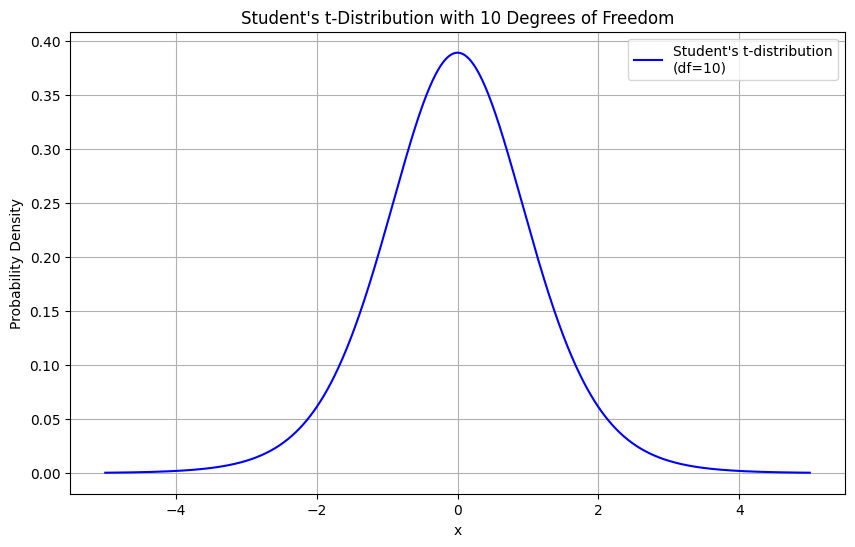

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
df = 10  # degrees of freedom

# Generate a range of x values
x = np.linspace(-5, 5, 1000)

# Compute the t-distribution probability density function (PDF)
pdf = t.pdf(x, df)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f"Student's t-distribution\n(df={df})", color='blue')
plt.title("Student's t-Distribution with 10 Degrees of Freedom")
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

#### Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.

The two-sample t-test for independent samples is used to determine if there is a significant difference between the means of two independent groups. In this example, we'll calculate the t-statistic and p-value for two random samples of equal size, given the null hypothesis that the population means are equal.


In [4]:
import numpy as np
from scipy import stats

# Define two random samples of equal size
sample1 = np.array([20.1, 21.3, 19.8, 20.5, 21.0, 22.3, 20.7, 21.5, 20.9, 21.2])
sample2 = np.array([22.0, 23.1, 22.5, 23.4, 22.8, 23.6, 22.9, 23.2, 23.1, 22.7])

# Calculate the t-statistic and p-value for the two-sample t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)

t_statistic, p_value

(-7.418156314481634, 7.060884160027545e-07)

#### Interpretation
- **t-statistic**: This value represents the difference between the sample means in relation to the variability or spread of the samples. It quantifies how much the sample means differ from each other compared to the expected variability under the null hypothesis. A larger absolute value of the t-statistic suggests a greater difference between the sample means.

- **p-value**: The p-value indicates the probability of observing the data, or something more extreme, assuming that the null hypothesis (which states that the population means are equal) is true. If the p-value is less than a chosen significance level (commonly 0.05), it suggests that the observed data is unlikely under the null hypothesis, leading us to reject the null hypothesis. A small p-value indicates strong evidence against the null hypothesis.

In summary:
- A **large t-statistic** and a **small p-value** provide evidence that the means of the two samples are likely different.
- A **small t-statistic** and a **large p-value** suggest that there is insufficient evidence to conclude that the means of the two samples are different.

#### Q11: What is Student’s t distribution? When to use the t-Distribution.

#### Student's t-Distribution

Student's t-distribution is a family of probability distributions that are used in statistical inference when the sample size is small and the population standard deviation is unknown. It is similar in shape to the standard normal distribution but has heavier tails, which allows it to account for the additional variability that small sample sizes introduce.

##### Characteristics:
- **Shape**: Bell-shaped and symmetric around zero, like the standard normal distribution.
- **Heavier Tails**: The t-distribution has heavier tails than the normal distribution, which provides a more accurate estimation of the variability for small sample sizes.

##### When to Use the t-Distribution:

1. **Small Sample Size**: When the sample size is small (typically $ n < 30 $). For small samples, the t-distribution provides a more accurate confidence interval and hypothesis test compared to the normal distribution.

2. **Unknown Population Standard Deviation**: When the population standard deviation is unknown. The t-distribution is used instead of the normal distribution when estimating the population mean from the sample mean.

3. **Hypothesis Testing and Confidence Intervals**: Use the t-distribution for hypothesis testing and constructing confidence intervals for the mean when working with small samples.

4. **Estimation of Mean**: In situations where you are estimating the mean of a population based on a sample and the sample size is not large enough to assume that the sample distribution of the mean is normal.

In summary, Student's t-distribution is particularly useful for making inferences about population means when dealing with small sample sizes and unknown population variances. As the sample size increases, the t-distribution approaches the normal distribution.


#### Q12: What is t-statistic? State the formula for t-statistic.

#### What is the t-Statistic?
The t-statistic is a measure used in hypothesis testing to determine if there is a significant difference between the means of two groups or if a sample mean significantly differs from a known value. It quantifies the size of the difference relative to the variation in the sample data.

In general, the t-statistic helps assess whether the observed data supports the null hypothesis or if it suggests a significant effect or difference.

#### Formula for the t-Statistic
The formula for the t-statistic depends on the type of t-test being performed. Here are the formulas for different scenarios:

##### 1. **One-Sample t-Test:**
When comparing the sample mean to a known value (population mean), the formula is:

$ t = \frac{\bar{X} - \mu_0}{\frac{s}{\sqrt{n}}} $

Where:
- $ \bar{X} $ = Sample mean
- $ \mu_0 $ = Population mean (known value)
- $ s $ = Sample standard deviation
- $ n $ = Sample size

##### 2. **Two-Sample t-Test:**
When comparing the means of two independent samples, the formula is:

$ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $

Where:
- $ \bar{X}_1 $ = Mean of sample 1
- $ \bar{X}_2 $ = Mean of sample 2
- $ s_1^2 $ = Variance of sample 1
- $ s_2^2 $ = Variance of sample 2
- $ n_1 $ = Sample size of sample 1
- $ n_2 $ = Sample size of sample 2

##### 3. **Paired Sample t-Test:**
When comparing means from the same group at different times or under different conditions, the formula is:

$ t = \frac{\bar{D}}{\frac{s_D}{\sqrt{n}}} $

Where:
- $ \bar{D} $ = Mean of the differences between paired observations
- $ s_D $ = Standard deviation of the differences
- $ n $ = Number of pairs

Each formula reflects the context of the test being performed and is used to compute the t-statistic, which is then compared to a critical value from the t-distribution to make a decision about the null hypothesis.

#### Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days and find the sample mean revenue to be $500 with a standard deviation of $50. Estimate the population mean revenue with a 95% confidence interval.

#### Estimating the Population Mean Revenue

To estimate the population mean revenue with a 95% confidence interval, we'll use the sample data provided by the coffee shop owner. We have:

- Sample size ($n$): 50 days
- Sample mean ($\bar{x}$): $500
- Sample standard deviation ($s$): $50

Since the sample size is large ($n > 30$), we can use the z-distribution to calculate the confidence interval. For a 95% confidence level, the critical value $z^*$ is approximately 1.96.

##### Confidence Interval Calculation

The formula for the confidence interval is:

$
\text{CI} = \bar{x} \pm z^* \left(\frac{s}{\sqrt{n}}\right)
$

where:
- $\bar{x}$ = sample mean
- $z^*$ = critical value for 95% confidence
- $s$ = sample standard deviation
- $n$ = sample size

In [5]:
# Let's compute the confidence interval.
import scipy.stats as stats

# Given data
sample_mean = 500
sample_std_dev = 50
sample_size = 50
confidence_level = 0.95

# Calculate the critical value for 95% confidence
z_critical = stats.norm.ppf((1 + confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z_critical * (sample_std_dev / (sample_size ** 0.5))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

confidence_interval


(486.1409617565032, 513.8590382434968)

#### Interpretation
The 95% confidence interval for the average daily revenue is approximately $\text{CI}$. This means we are 95% confident that the true population mean revenue falls within this interval.

#### Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.


### Hypothesis Test for New Drug Effect

A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. The clinical trial with 100 patients provides the following data:

- Sample size ($n$): 100
- Sample mean decrease in blood pressure ($\bar{x}$): 8 mmHg
- Sample standard deviation ($s$): 3 mmHg
- Hypothesized population mean decrease ($\mu_0$): 10 mmHg
- Significance level ($\alpha$): 0.05

We will conduct a one-sample t-test to test the hypothesis that the drug decreases blood pressure by 10 mmHg.

#### Hypotheses

- Null hypothesis ($H_0$): $\mu = 10$ mmHg (The drug decreases blood pressure by 10 mmHg)
- Alternative hypothesis ($H_A$): $\mu \neq 10$ mmHg (The drug does not decrease blood pressure by 10 mmHg)

We will use the t-test formula for the test statistic:

$
t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}
$

where:
- $\bar{x}$ = sample mean
- $\mu_0$ = hypothesized population mean
- $s$ = sample standard deviation
- $n$ = sample size

#### Perform the Test

In [6]:
# Let's calculate the t-statistic and compare it with the critical value for a two-tailed test with a significance level of 0.05.
import scipy.stats as stats

# Given data
sample_mean = 8
hypothesized_mean = 10
sample_std_dev = 3
sample_size = 100
alpha = 0.05

# Calculate the t-statistic
t_statistic = (sample_mean - hypothesized_mean) / (sample_std_dev / (sample_size ** 0.5))

# Calculate the critical t-value for a two-tailed test
t_critical = stats.t.ppf(1 - alpha / 2, df=sample_size - 1)

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=sample_size - 1))

t_statistic, t_critical, p_value


(-6.666666666666667, 1.9842169515086827, 1.5012289189542116e-09)

#### Interpretation

- **t-statistic**: This value represents how far the sample mean is from the hypothesized mean in terms of standard errors. It measures the deviation of the sample mean from the hypothesized mean under the null hypothesis.

- **t-critical**: This is the critical value for the t-distribution at a 0.05 significance level for a two-tailed test. It defines the threshold beyond which we reject the null hypothesis.

- **p-value**: This is the probability of observing a test statistic as extreme as, or more extreme than, the one computed, assuming the null hypothesis is true. It helps determine the significance of the results.

**Decision Criteria**:
- Compare the absolute value of the t-statistic to the t-critical value:
  - If $|t_{\text{statistic}}| > t_{\text{critical}}$, reject the null hypothesis.
  - If $|t_{\text{statistic}}| \leq t_{\text{critical}}$, do not reject the null hypothesis.

- Alternatively, compare the p-value to the significance level:
  - If the p-value < 0.05, reject the null hypothesis.
  - If the p-value ≥ 0.05, do not reject the null hypothesis.

These comparisons will help you determine whether there is sufficient evidence to conclude that the drug's effect on blood pressure is different from the hypothesized decrease of 10 mmHg.


#### Q15. An electronics company produces a certain type of product with a mean wemight of 5 pounds and a standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01.

#### Hypothesis Test for Mean Weight of Products

We are given:
- Population mean weight ($\mu$) = 5 pounds
- Population standard deviation ($\sigma$) = 0.5 pounds
- Sample size ($n$) = 25
- Sample mean weight ($\bar{x}$) = 4.8 pounds
- Significance level ($\alpha$) = 0.01

##### Hypotheses

- Null Hypothesis ($H_0$): $\mu = 5$ pounds (The true mean weight is 5 pounds)
- Alternative Hypothesis ($H_1$): $\mu < 5$ pounds (The true mean weight is less than 5 pounds)

##### Test Statistic

Since the sample size is large ($n > 30$), we use the Z-test for the hypothesis test. The test statistic $Z$ is given by:

$ Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} $

Substitute the given values:

$
Z = \frac{4.8 - 5}{\frac{0.5}{\sqrt{25}}} = \frac{-0.2}{0.1} = -2
$

##### Critical Value

For a one-tailed test at $\alpha = 0.01$, we need to find the critical value of $Z$ from the Z-table. 

The critical value $Z_{\text{crit}}$ for $\alpha = 0.01$ is approximately $-2.33$.

##### Decision Rule

- If $Z \leq Z_{\text{crit}}$, we reject $H_0$.
- If $Z > Z_{\text{crit}}$, we fail to reject $H_0$.

##### Conclusion

Since $Z = -2$ and $-2 > -2.33$, we fail to reject the null hypothesis. 

There is not enough evidence at the 0.01 significance level to conclude that the true mean weight of the products is less than 5 pounds.


#### Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

### Hypothesis Testing for Two Independent Samples

Two groups of students are given different study materials, and we want to test whether there is a significant difference in their test scores.

##### Given Data:
- **Group 1:**
  - Sample size ($ n_1 $) = 30
  - Mean score ($ \bar{X}_1 $) = 80
  - Standard deviation ($ s_1 $) = 10

- **Group 2:**
  - Sample size ($ n_2 $) = 40
  - Mean score ($ \bar{X}_2 $) = 75
  - Standard deviation ($ s_2 $) = 8

- **Significance Level:** $ \alpha = 0.01 $

##### Hypotheses:
- **Null Hypothesis (H₀):** The population means for the two groups are equal.  
  $ H_0: \mu_1 = \mu_2 $

- **Alternative Hypothesis (H₁):** The population means for the two groups are not equal.  
  $ H_1: \mu_1 \neq \mu_2 $

##### Formula for the t-Statistic:

For two independent samples, the formula for the t-statistic is:

$ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $

##### Calculation:

1. **Calculate the standard error (SE):**

   $
   \text{SE} = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}
   $

   $
   \text{SE} = \sqrt{\frac{10^2}{30} + \frac{8^2}{40}}
   $

   $
   \text{SE} = \sqrt{\frac{100}{30} + \frac{64}{40}} = \sqrt{3.333 + 1.6} = \sqrt{4.933} \approx 2.22
   $

2. **Calculate the t-statistic:**

   $
   t = \frac{80 - 75}{2.22} = \frac{5}{2.22} \approx 2.25
   $

3. **Determine the degrees of freedom (df):**

   The degrees of freedom for the t-test can be approximated using:

   $
   \text{df} = \min(n_1 - 1, n_2 - 1) = \min(30 - 1, 40 - 1) = \min(29, 39) = 29
   $

4. **Find the critical value from the t-distribution:**

   For a two-tailed test with $ \alpha = 0.01 $ and df = 29, we look up the critical value in the t-distribution table.

   The critical value for $ \alpha = 0.01 $ (two-tailed) and df = 29 is approximately $ \pm 2.756 $.

5. **Compare the t-statistic to the critical value:**

   Since the calculated t-statistic (2.25) is less than the critical value (2.756), we fail to reject the null hypothesis.

##### Conclusion:

At the 0.01 significance level, there is not enough evidence to conclude that the population means for the two groups are different. Thus, we do not reject the null hypothesis.



#### Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. Estimate the population mean with a 99% confidence interval.

#### Confidence Interval for Average Number of Ads Watched

We are given:
- Sample mean ($\bar{x}$) = 4 ads
- Sample standard deviation ($s$) = 1.5 ads
- Sample size ($n$) = 50
- Confidence level = 99%

##### Confidence Interval Calculation

To estimate the population mean with a 99% confidence interval, we use the formula for the confidence interval of the mean:

$
\text{CI} = \bar{x} \pm Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}
$

where:
- $\bar{x}$ is the sample mean
- $Z_{\alpha/2}$ is the critical value from the Z-distribution for a 99% confidence level
- $s$ is the sample standard deviation
- $n$ is the sample size

##### Critical Value

For a 99% confidence level, the critical value $Z_{\alpha/2}$ is approximately 2.576 (from Z-tables).

##### Calculation

1. **Standard Error**:
   $
   \text{SE} = \frac{s}{\sqrt{n}} = \frac{1.5}{\sqrt{50}} \approx \frac{1.5}{7.071} \approx 0.212
   $

2. **Margin of Error**:
   $
   \text{ME} = Z_{\alpha/2} \cdot \text{SE} = 2.576 \cdot 0.212 \approx 0.546
   $

3. **Confidence Interval**:
   $
   \text{CI} = \bar{x} \pm \text{ME} = 4 \pm 0.546
   $
   $
   \text{CI} = (4 - 0.546, 4 + 0.546) = (3.454, 4.546)
   $

##### Conclusion

The 99% confidence interval for the average number of ads watched by viewers during the TV program is approximately $(3.454, 4.546)$.
